In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_X = np.random.rand(30, 1)
train_Y = train_X * 2 + np.random.normal(3, .1, [30,1])

test_X = np.random.rand(10, 1)
test_Y = test_X * 2 + np.random.normal(3, .1, [10,1])

In [7]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [46]:
pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_mean(tf.pow(pred-Y, 2))
optimizer = tf.train.AdagradOptimizer(learning_rate=0.2).minimize(cost)

Epoch=0, cost-tr=6.998, cost-te=7.013, W=0.435, b=1.121
Epoch=3, cost-tr=0.841, cost-te=0.841, W=1.445, b=2.367
Epoch=6, cost-tr=0.129, cost-te=0.129, W=1.778, b=2.773
Epoch=9, cost-tr=0.026, cost-te=0.028, W=1.905, b=2.925
Epoch=12, cost-tr=0.010, cost-te=0.013, W=1.956, b=2.982
Epoch=15, cost-tr=0.008, cost-te=0.011, W=1.977, b=3.003
Epoch=18, cost-tr=0.007, cost-te=0.010, W=1.987, b=3.010
Epoch=21, cost-tr=0.007, cost-te=0.010, W=1.992, b=3.012
Epoch=24, cost-tr=0.007, cost-te=0.010, W=1.995, b=3.012
Epoch=27, cost-tr=0.007, cost-te=0.010, W=1.998, b=3.012
Optimization done
Testing cost: 0.010, with w=2.000, b=3.011


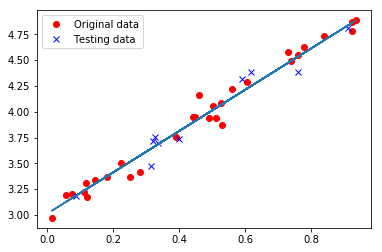

In [47]:
init = tf.global_variables_initializer()

n_epoches = 30
display_epoch = 3
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoches):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y:y})
        if (epoch) % display_epoch == 0:
            c_tr = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            c_te = sess.run(cost, feed_dict={X: test_X, Y:test_Y})
            print("Epoch={}, cost-tr={:.3f}, cost-te={:.3f}, W={:.3f}, b={:.3f}".format(epoch, c_tr, c_te, W.eval(), b.eval()))

    print("Optimization done")
    testing_cost = sess.run(cost, feed_dict={X: test_X, Y: test_Y})
    print("Testing cost: {:.3f}, with w={:.3f}, b={:.3f}".format(testing_cost, W.eval(), b.eval()))
    
    fig = plt.figure()
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(test_X, test_Y, 'bx', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b))
    plt.legend()
    plt.show()